<a href="https://colab.research.google.com/github/TMA040685/Gravitationsbolger_med_LIGO/blob/main/Gravitationsb%C3%B8lger_med_LIGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gravitationsbølge projekt**
I nærværende øvelse skal vi undersøge gravitationsbølger ved hjælp af python kode og adgang til LIGOs offentlige data fra deres *LIGO Open Science Center* (**LOSC**)

***I din Eksamens portfolio skal du beskrive hvad du laver og dokumentere det med passende figurer.***

Du kan altid gemme en figur ved at højreklikke på den og vælge *gem billede som*!


## 1 - Adgang til data
Denne øvelse guider dig igennem basale det basale arbejde med at finde, downloade og indlæse data fra **LOSC** websitet.
Hertil kommer at øvelsen anvender Python programering. Til python anvendes [Google Colab](https://colab.research.google.com) som er en online google løsning hvorm man både kan skrive tekst og computer program - *hvis du læser dette er du allerede det rigtige sted*.

### 1.1  - *Installation af biblioteker*
Før vi kan begynde er der et par ting som vi er nødt til at installere i softwaren dette gøres på følgende måde:

Dobbeltklik (eller tryk på ```Enter```) for at redigere en celle enten med kode eller med tekst.

In [85]:
# -- Til Google Colab
!pip install -q "gwpy==1.0.0" "gwosc==0.5.5" "astropy"

Den grå boks herover er et kode felt som kan anvendes til at skrive noget program og til at afvikle dele af et program. I dette tilfælde downloader og installere den de specificerede biblioteker. 
Hold nu musen over den grå boks og *klik* på play kanppen i venstre side. 

**N.B.**: Når du har kørt denne del af koden er det vigtigt at du genstarter din RunTime dette gøres ved at trykke på *Kørsesltid* og vælge *Genstart Kørselstid* fra menuen. Nu kommer der en dialog her vælges der **Ja**

Nu da bibliotekerne er installeret skal vi tjekke versionerne stemmer dette gøres som vist herunder.

In [1]:
import gwpy                   # Indlæs GWpy biblioteket
print(gwpy.__path__)          # Udskriv stien til biblioteket på skærmen
print(gwpy.__version__)       # Udskriv versionsnummeret for gwpy

['/usr/local/lib/python3.7/dist-packages/gwpy']
1.0.0
4.3.1


Outputtet er vist herover. Her tjekkes at versionsnummeret er korrekt. 

---

### 1.2 - **Øvelse:** *Tjek versionen af ```gwosc``` og ```astropy```*
Opdater nu den grå kodeboks herover således at også stien til biblioteket **gwosc** samt versionsnummeret for bibkioteket vises på skærmen - Kontroller at det passer med de downloadede versionsnumre - de kan ses i det første kodefelt.

---



## 2 - Find et event 
Vi skal nu se om vi kan finde nogle data fra LIGO for et tyngdebølge event. Jeg vil gå igennem denne øvelse med det event som hedder ***GW190814*** som var den første direkte detektion af et astrofysisk gravitationsbølge signal nogensinde.

**N.B.**: Når I skal lave jeres kode skal I anvende eventet **GW150914**.

For at vi kan hente data fra LOSC skal vi først kende den eksagte tid for hvornår eventet fandt sted. Så det begynder vi med at slå op.

In [9]:
%matplotlib inline                          
from gwosc.datasets import event_gps        # indlæs rotinen EVENT_GPS fra gwosc.datasets biblioteket
igps = int(event_gps('GW190814'))           # Hent information om GPS-tidspunktet for detektionen og gem som igps
print('GPS-tid:' , igps)                                 # Udskriv tiden på skærmen (et antal sekunder siden en bestemt dato)

from astropy.time import Time               # Importer tidskonverteren fra biblioteket Astropy
t = Time(igps, format='gps')                # Gem din GPS tid for eventet som t 
t = Time(t, format='iso', scale='utc')      # Konverter din GPS tid til Universal Time (UT)
print('UT-tid:' , t)                                    # Udskriv tiden på skærmen.

GPS-tid: 1249852257
UT-tid: 2019-08-14 21:10:39.000


---

### 2.1 - **Øvelse:** *Find GPS tiden for et event

Prøv nu om du kan finde tiden for eventet **GW150914**! - du kan bruge kodefeltet herunder

Rigtig godt gået!

---



Nu vil vi gerne oprettet et tidsinterval omkring det tidspunkt som vores GPS opslag gav. I dette tilfælde kan vi nøjes med et segment med 5 sekunder på hverside af tidspuntet *igps*. For andre events skal dette muligvis justeres.

In [10]:
seg = (igps-5, igps+5)                      # Dan et tidssegment

Når vi har lavet et segment er det muligt at søge efter data. I denne øvelse skal vi hente data fra interferometeret i Hanford, her anvendes et tag 'H1'. Vi har følgende valgmuligheder.

* 'H1' - LIGO-Hanford
* 'L1' - LIGO-Livingston

I nogle tilfælde er der også andre detektorer til rådighed

* 'G1' - GEO600
* 'K1' - KAGRA
* 'V1' - (Advanceret) Virgo

Herunder viser jeg hvordan man henter data for eventet *GW190814* - prøv selv at gøre det samme men for **GW150914**

In [11]:
from gwpy.timeseries import TimeSeries                                     # Indlæs rotinen TimeSeries fra gwpy
hdata = TimeSeries.fetch_open_data('H1', *seg, verbose=True, cache=True)   # Lav en forespørgsel på data og hent dem
print(hdata)                                                               # Print data på skærmen

Fetched 1 URLs from www.gw-openscience.org for [1249852252 .. 1249852262))
Reading data... [Done]
TimeSeries([-8.84687943e-20, -7.56243145e-20, -8.58130556e-20,
            ...,  9.73317404e-20,  9.50493787e-20,
             6.55415606e-20]
           unit: dimensionless,
           t0: 1249852252.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


Den del af kommandoen hvor vi sætter ```verbose = True``` tillader os at se at GWpy har fundet en fil og at den tilbyder data for det givne interval, og at modulet har downloadet filen, og indlæst data. Filen er ikke permanent gemt på harddisken, så næste gang du laver det samme kald vil filen blive downloadet igen, men hvis du ved at du skal gentage det samme kald flere gange så kan du sætte ```cache=True``` for at gemme filen lokalt på din computer.


---
### 2.2 - **Øvelse:** *Prøv at hente data for GW150914*
I denne øvelse skal du prøve om du kan gøre det samme som vist ovenfor men nu for eventet **GW150914**.

**TILLYKKE** Du har nu hentet og downloadet rigtige LIGO data for eventet ***GW150914*** (*den første rigtige detektion af en GW*)!

Det næste vi skal er at se nærmere på vores data.


---




## 3 - At plotte data
Når vi skal plotte data i Python anvendes en pakke kaldet *matplotlib* - bare rolig vi har allerede indlæst den.

For at lave et direkte plot af de downloadede data skal vi blot skrive følgende i et kode felt:

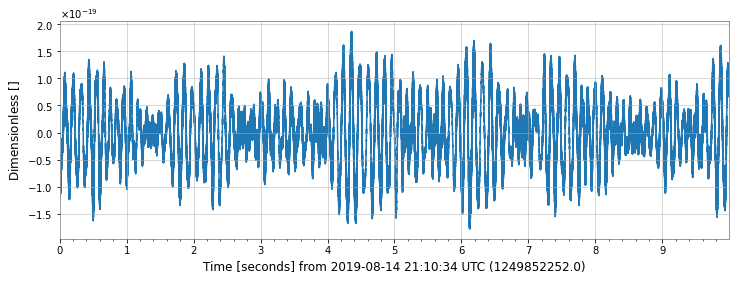

In [12]:
plot = hdata.plot()

når vi betragter figuren herover er det tydeligt at vi egnetlig ikke kan sige noget som helst om hvorvidt der er et GW signal i vores hentede datasæt.

---

### 3.1 - **Øvelse:** *Plot data for GW150914*
Prøv i kode feltet herunder om du kan plotte data for eventet **GW150914**


**TILLYKKE:** du har nu lavet en flot figur som viser dine data. *Bemærk:* du kan downloade figuren i høj opløsning ved blot at klikke på den og så vælge ```gem billede som``` herved får du en PNG-billed fil som kan indsættes i OneNote.

---

## 4 - Databehandling
De data du plottede herover er rå data direkte fra LIGO. Herunder skal vi se på om vi er i stand til at filtrere vores data så vi måske kan få øje på det signal vi leder efter.

Vi begynder med at loade og cache et datasæt, *Bemærk:* du skal fortsat arbejde med det datasæt du har gang i - **GW150914**.

Fetched 1 URLs from www.gw-openscience.org for [1249852252 .. 1249852262))
Reading data... [Done]


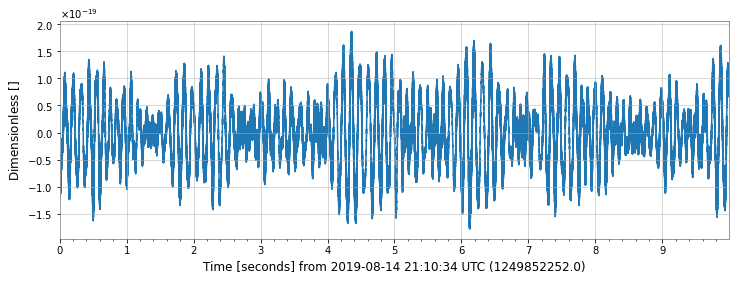

In [13]:
igps = int(event_gps('GW190814'))
seg = (igps - 5, igps + 5)
hdat = TimeSeries.fetch_open_data('H1', *seg, verbose=True, cache=True)
plot = hdat.plot()

Her ser du igen et ufiltreret data som ser ud til at være domineret meget af lav-frekvent støj som dominere over amplituden.

Vi kan konvertere dataene med noget matematik som kaldes en *Fourier-transform*.

Fourier-transformen flytter vores data fra et tids domæne til et frekvensdomæne. Det kan gøres på følgende vis: 

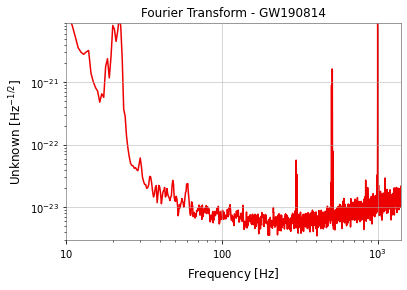

In [14]:
hft = hdat.asd(fftlength=2)                                             # Beregn fourier transformen for dit datasæt
plot2 = hft.plot(color='gwpy:ligo-hanford')                             # Lav en figur der viser din beregnede Fourier transform
ax = plot2.gca()                                                        # Hent figurens akse informationer
ax.set_xlim(10,1400)                                                    # Sæt den øvre og nedre frekvens grænse på figurens x-akse
ax.set_ylim(3e-24,9e-21)                                                # Sæt grænserne for y-aksen
ax.set_title('Fourier Transform - GW190814')                            # Giver grafen en titel
plot2.show()                                                            # Viser grafen på skærmen.

Her er det tydeligt at vores data er domineret af støj på forskellige måder:

*   **Lav frekvent** - *ses ved stor amplitude ved lave værdier af $f$*
*   **Meget høje frekvenser** - *ses ved stigende amplidude for store værdier af $f$*
*   **Spektral linjer** - *ses ved lodrette emissions linjer i spektreret*

Selv hvis vi zoomer ind på vores data omkring den *formodede* event, vil vi ikke kunne se noget åbentlyst:

(1249852256.4, 1249852257.6)

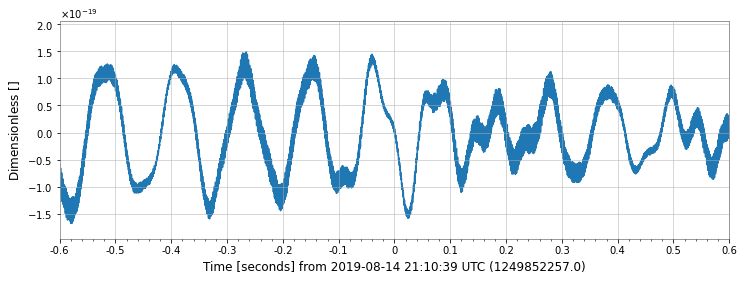

In [15]:
plot = hdat.plot()                # Plot vores data
ax = plot.gca()                   # Hent informationer om vores akser
ax.set_epoch(igps)                # Sætter tiden lig 0 ved vores event.
ax.set_xlim(igps -.6 , igps + .6)   # Sæt nye grænser på x-aksen.

---

### 4.1 - **Øvelse:** *lav nu et Fourier plot for GW150914*
I denne øvelse skal du prøve at lave to ting
1. Lav *fourier transformen* for dine data (*Den røde graf*) her kan du med fordel sætte dine **y-akse** grænser til $(3e-24,5e-24)$.
  * Når du har lavet denne graf skal du kommetere på hvilke typer af støj vi kan identificere
  * Hvordan ser du disse typer af støj på din graf?
2. Lav en graf hvor du **zoomer ind ** omkring det formodede GW event.
  * Kommenter på hvad du ser på grafen.

Du kan benytte kodefelterne herunder til at lave dine figurer

#### **Fourier Transform**

**Zoom omkring eventet**

**Flot arbejde!**

---

## 5 - Signal behandling af Fourier data
I den idelle verden ønsker vi at fjerne alt støj fra vores datasæt, dette kan gøres ved at skifte til tids-domægne fitrering

Vi kan filtrere disse data for at fjerne støjen ved frekvenser uden for det ønskede bånd vi er interesserede i at studere. GW150914 er opstået fra en sammensmeltning af to ultra kompakte sorte huller, som var opløselige af LIGO detektoren i et frekvensbånd mellem $f\approx 50 \mathrm{~Hz}$ og $f\approx 250 \mathrm{~Hz}$. For andre events, kan det være nødvendigt at tilpasse frekvenserne i båndet en smugle afhængigt af signalets udseende.

På denne måde kan vi se om der er et signal som står mere tydeligt frem i vores data sæt. Vi gør det på følgende måde.

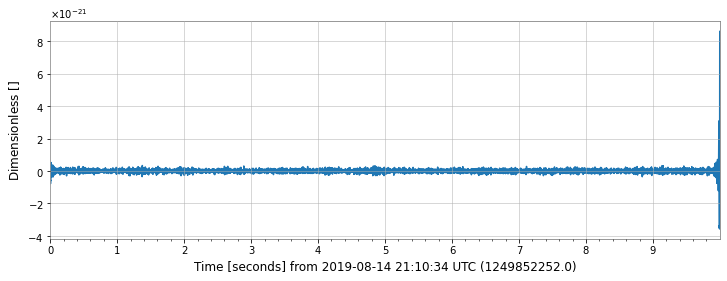

In [16]:
hbp = hdat.bandpass(50, 250, filtfilt=True)       # Beregner bandpass filteret for vores data, argumenterne er f_lav, f_høj, filtrering!
plothbp = hbp.plot()                              # Plot resultatet

Af ovenstående figur fremår det at skaleringen på y-aksen er en anelse underlig, hvilket skyldes at amplituden i den første del er meget højere end resten af dataene, dette skyldes at det tager filteret en brøkdel af et sekund at falde til ro, i et godt leje.

Den bedste løsning er at trimme datasættet således at vi skærer det første sekund væk, og det sidste sekund da det samme ses her og det er et artifakt fra ```filtfilt=True``` flaget. Vil kan skære datasættet til ved hjælp af ```crop()``` metoden, ved at give det et nyt sæt af start og slut tider i GPS-tider.

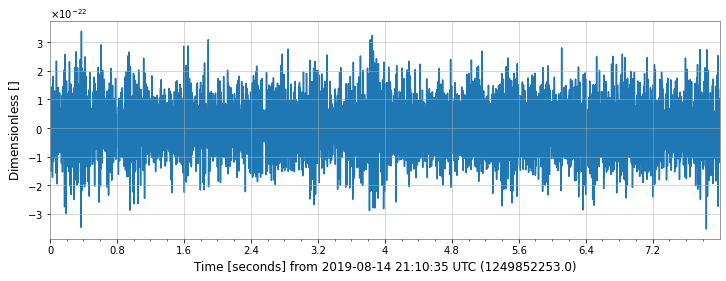

In [17]:
hbp = hbp.crop(igps - 4, igps + 4)            # Beskær data !!! Herefter er der ingen vej tilbage!!!
plbp = hbp.plot()                             # Plot resultatet

Nu Ser det ud til at der muligvis ligger et signal omkring et $\Delta t = 3.8 \mathrm{~s}$. Derfor prøver vi at igen at lave et zoom omkring vores signal.


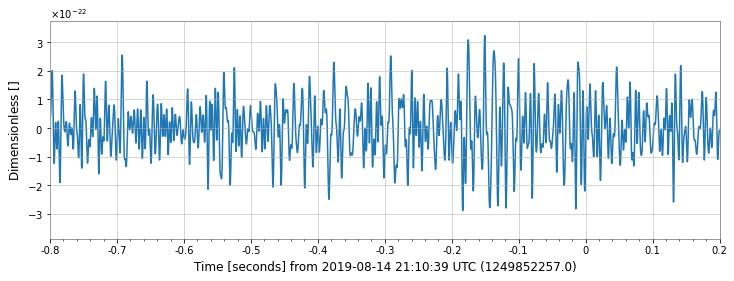

In [22]:
ax = plbp.gca()                                 # Hent akse informationerne
ax.set_epoch(igps)                              # Set t = 0 der hvor GPS tiden for eventet er
ax.set_xlim(igps - .8, igps +.2)                # indstil x-aksen til at vise et udsnit af data
plbp                                            # Plot den nye figur

Vi har nu et plot med noget der kunne være et event som ligger lige inden selve detektionen ved tiden $\Delta t =  0 \mathrm{~s}.

---

### 4.3 - **Øvelse:**  *Bandpass filter for GW150914*
Du skal i denne øvelse prøve tre ting, på følgende måde:

1. Først skal du prøve at beregne *Bandpass-filteret* for dit GW-event.
  * Prøv i den forbindelse at beskrive hvad du ser på grafen. 
  * Kan du identificere signalet på grafen?
2. Lav nu et zoom - beskæring af data med funktionen ```hbp.crop``` **Bemærk:** processen er *ireversibel* - der er ingen vej tilbage efter dette step.
  * Blev dit signal tydeligere eller svagere ved denne beskæring af data?
3. Lav et zoom omkring eventet på dit beskårede datasæt - Du skal muligvis justere på intervallet i linjen ```ax.set_xlim(igps - .4, igps + .2)```.
  * Er dit event blevet tydeligere eller sværere at identficere?

Du kan benytte kode-felterne herunder til at lave de tre figurer:

#### **Bandpass**

**Beskæring**

**Plot et zoom**

**FLOT ARBEJDE**

---


## 6 - Anvendelse af *power-notch* filtrering

Når du betragter din sidste figur er der *måske* et signal som kunne stamme fra sammensmeltningen af to sorte huller. Men der er stadig temmelig meget støj - derfor vil vi nu prøve om vi er i stand til at fjerne noget af støjen. 

Fra figuren med *fourier transformen* hvor vi brugte **ASD** funktionen kan vi se at der er nogle store spektral linjer som er meget større end det GW-signal vi leder efter. Vi kan nu designe et filter som kan fjerne dette signal som vi ikke er interesseret i.

For at gøre dette skal vi anvende en rotine kaldet ```filter_design``` til at designe vores filter ser er en serie af *Notches* hvorved filtret giver power.

Det viser sig ved analyse at en del af den støj vi ser kommer fra en grundsvingning $f_0 = 60 \mathrm{~Hz}$ samt to efterfølgende overtoner - dette signal stammer fra den amerikanske veksels-strømforsyning (AC).

Filtret oprettes på følgende vis.

In [23]:
from gwpy.signal import filter_design                                           # Indlæs rotinen filter_design
notches = [filter_design.notch(f, hdat.sample_rate) for f in (60, 120, 180)]    # Konstruer vores notches
powernotch = filter_design.concatenate_zpks(*notches)                           # Kombinere vores notches til et samlet filter kaldet powernotch

Nu da vi har vores filter *powernotch* er vi klar til at anvende det på vores datasæt. Dette gør vi ved hjælp funktionen filter som minder om den funktion vi anvendte da vi skulle beregne bandpass-filteret.

(1249852256.2, 1249852257.2)

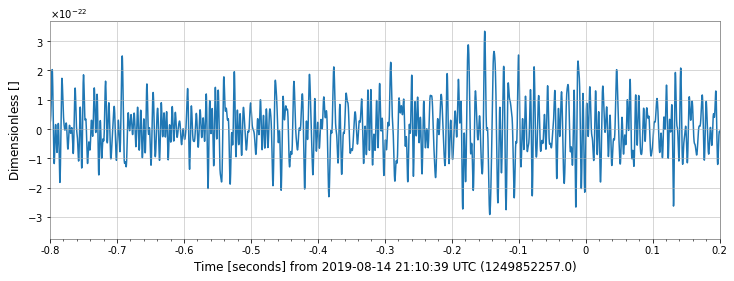

In [25]:
hcl = hbp.filter(powernotch, filtfilt=True)
plot4 = hcl.plot()
ax = plot4.gca()
ax.set_epoch(igps)
ax.set_xlim(igps-0.8, igps + 0.2)

---

### 6.1 - **Øvelse:** *Filtrering af GW150914 data*
Du skal nu prøve om du kan lave filteret som vist herover og om du kan lykkedes med at fitrere dine data. 

...

Du kan benytte kode feltet herunder:

**GODT ARBEJDE!**

---

## 7 - Data fra en anden detektor

Desværre for os er det ikke nok med data fra en enkelt detektor når vi skal kigge efter gravitations bølger - det kunne jo være en fejl måling i detektoren derfor er vi nødt til at have et plot af den samme event men fra to uafhængige målestationer. Heldigvis har LIGO to sådanne stationer en i Hanford ('**H1**') som er de data vi har kigget på indtil nu, og så har de en station i Livingston ('**L1**') som vi skal prøve at hente data fra nu og databehandle som vi har gjort oven for.

Vi henter data på følgende måde:

Fetched 1 URLs from www.gw-openscience.org for [1249852252 .. 1249852262))
Reading data... [Done]


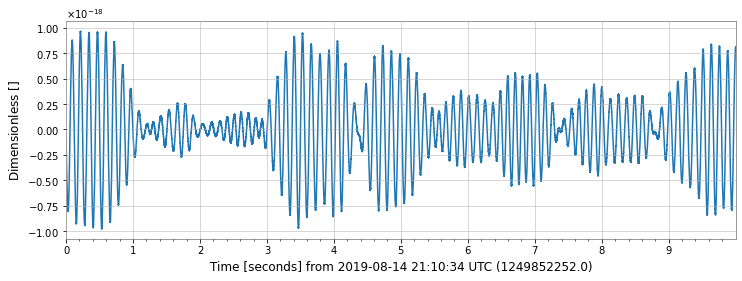

In [26]:
ldata = TimeSeries.fetch_open_data('L1', *seg, verbose=True, cache=True)
plot6 = ldata.plot()

Vi kalder de nye data *ldata* for at kunne adskilde dem fra Hanford data som vi kaldte *hdata*

---

### 7.1 - **Øvelse:** *Hent nu et datasæt fra Livingston detektoren*
I denne øvelse skal du nu hente Livingston data for det event **GW150914** som du undersøger. Du kan med fordel gøre det i nedenstående kode-felt.

**SUPER**

---

### 7.2 - Databehandling af Livingston data

Ligesom de data vi allerede har lavet databehandling på skal vi også for data fra Livingston foretage databehandlingen den falder i de samme faser som for for Handford data. Vi kommer til at løbe dem meget hurtigt igennem her og du kan blot bruge det som reference for den øvelse du skal lave i punkt 7.3.

Først plottes et udsnt af datasættet umidelbart før eventet.

(1249852256.0, 1249852257.0)

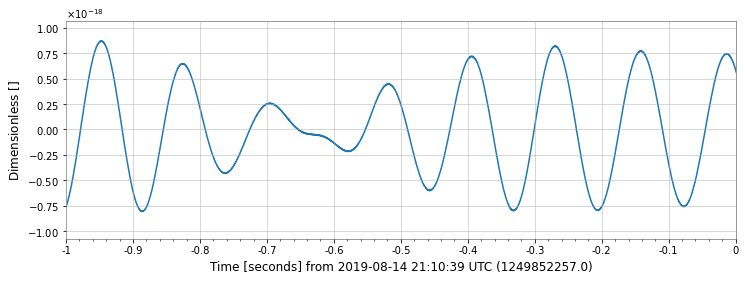

In [27]:
plot7 = ldata.plot()
ax = plot7.gca()
ax.set_epoch(igps)         # Sætter tiden lig 0 ved vores event.
ax.set_xlim(igps -1, igps)

#### *7.2.1 - Bandpass filtrering af Livingston data*
Herefter anvendes et bandpass filter på vores data fra Livingston. Og vi plotter herefter resultatet - husk igen at anvende *l* som indikator for Livingston data.

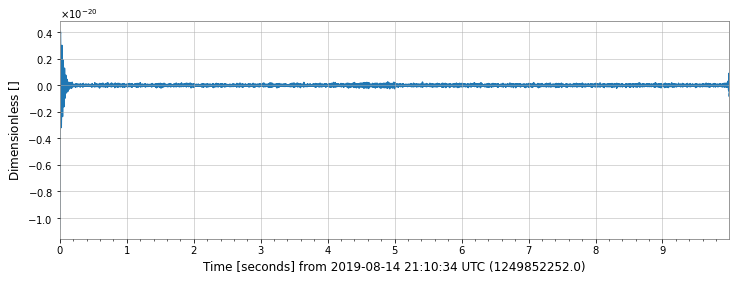

In [28]:
lbp = ldata.bandpass(50, 250, filtfilt=True)
plot8 = lbp.plot()

Ligesom for Handford dataene ser vi også her at der er en ligger et stort *falskt* signal i enderne, du ser ded ved at dine data ikke fylder meget af grafvinduet i vertikal retning. 

#### *7.2.2 - Beskæring af Livingston data*
Derfor er vi igen nødt til at beskære datasættet - **HUSK:** at der ingen vej er tilbage efter en beskæring så grænserne er vigtige her.

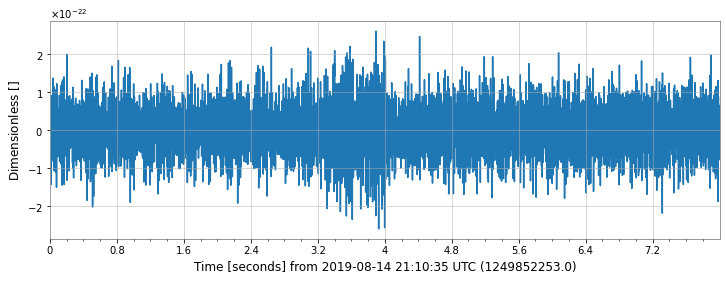

In [29]:
lbp = lbp.crop(igps - 4, igps+ 4)
plot9 = lbp.plot()

Det hjalp på vores datasæt nu fylder vores signal største delen af figuren. men der er temmelig meget støj på figuren. Vi kan fjerne noget af støjen ved blot at plotte et udsnit af grafen det gør vi herunder. 

#### *7.2.3 - Zoom ind på GW event i Livingston data*
Vi ændre nu på x-aksen ved at manipulerer med $x_{min}$ og $x_{max}$ grænserne her kan frit justeres for det event du arbejder med skal du nok forvente at den er mellem $x_{min} =igps -0.4$ og $x_{max} = igps + 0.2$.

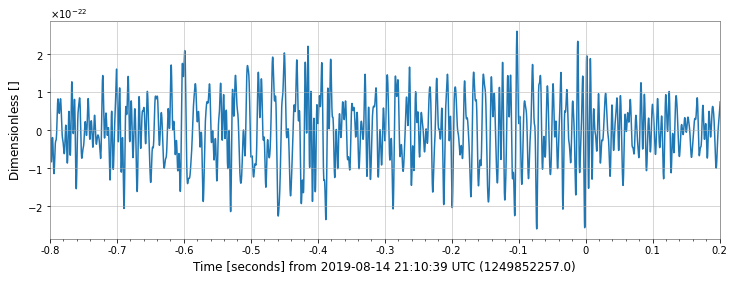

In [30]:
ax = plot9.gca()
ax.set_epoch(igps)
ax.set_xlim(igps - 0.8, igps + 0.2)
plot9

Du burden nu se en rigtig pæn signal detektion, men hvor der stadig er en del støj på.

#### *7.2.4 - Powernotch filtrer Livingston data*
Derfor skal vi også gennemløbe vores *powernotch*-filter for at fjerne den støj der måtte være tilbage i vores data. Dette gøre som for Handford data på følgende måde. 

(1249852256.2, 1249852257.2)

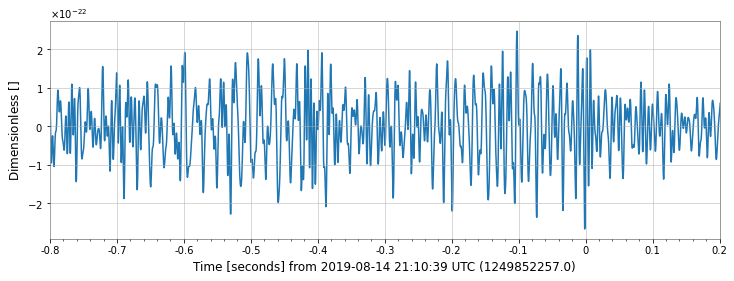

In [32]:
lclean = lbp.filter(powernotch, filtfilt=True)
plot10 = lclean.plot()
ax = plot10.gca()
ax.set_epoch(igps)
ax.set_xlim(igps - 0.8, igps + 0.2)

Nu har vi et pænt signal fra Livingston detektoren fra LIGO.



___

### 7.3 - **Øvelse:** *Databehandling af Livingston data*
Du skal nu gennemfører databehandlingen med det nye datasæt. Databehandlingen skal gennemføres på helt samme måde som for Hanford datasættet.

Brug kode-felterne herunder til at lave databehandlingen, du kan med fordel anvende afsnit 7.2 som guide til processen.


**FLOT ARBEJDE**

---

## 8 - Sammenlign de to datasæt

Da vi nu har to datasæt fra to uafhængige målestationer, er vi i stand til at se om vi har en korrelation af signaler, altså om vi har et event som sker ca. samme sted i tid. 

Dette gør vi på følgende måde

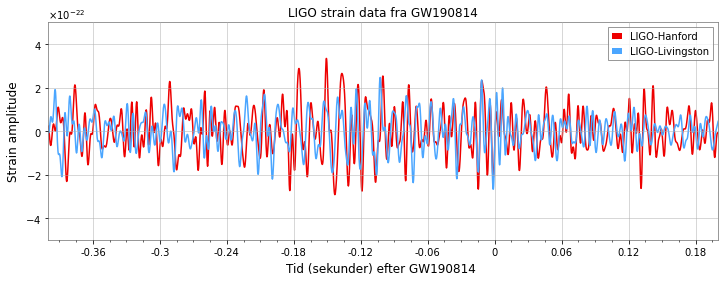

In [37]:
from gwpy.plot import Plot                                                  # Importer ny plotte rotine
plot11 = Plot(figsize=(12,4))                                               # Opret en figur med bestemte dimensioner 12 bred og 4 høj
ax = plot11.gca()                                                           # Hent akse informationerne 
ax.plot(hcl, color='gwpy:ligo-hanford', label='LIGO-Hanford')               # Plot de rensede Hanford data kommandoen color: angiver farven på plottet Hanford er lyseblå 
ax.plot(lclean, color='gwpy:ligo-livingston', label='LIGO-Livingston')      # Plot de rensede Livingston data med farven hørende til Livingston
ax.set_xscale('seconds', epoch=igps)                                        # Sæt skalaen på x-aksen samt epoken
ax.set_xlim(igps - 0.4, igps + 0.2)                                         # Sæt begrænsningerne på x-aksens
ax.set_xlabel('Tid (sekunder) efter GW190814 ')                             # Set en akse titel på x-aksen
ax.set_ylim(-5e-22, 5e-22)                                                  # Sæt grænserne på y-aksen (skal måske justeres på dit plot)
ax.set_ylabel('Strain amplitude')                                           # Sæt titlen på y-aksen
ax.set_title('LIGO strain data fra GW190814')                               # Giv figuren en titel
ax.legend()                                                                 # Plot en forklaring til figuren

Her kan vi sammenligne eventuelle ligheder og forskelle mellem de to signaler. Det gør os i stand til at afgøre om vi skal gå videre med undersøgelsen. I dette tilfælde ser der ud til at kunne være et signal enten lige før eventet eller omkring 0,5 sek efter eventet.

---

### 8.1 - **Øvelse:** *data sammenligning*

I denne øvelse skal du prøve at lave ovenstående figur men med den event du arbejder med. 
Når du har fået lavet figuren skal du prøve om du kan lave en beskrivelse af hvad du observerer for de to signaler.
* Hvilke ligheder ser du af figuren?
* Hvilke forskelle ser du på figuren mellem de to datasæt?
* Hvor ser eventet ud til at foregå?

Du kan med fordel benytte nedenstående kode-felt til arbejdet.

**Så er du næste nået i mål**

---

## 9 - Spektrogrammer for vores data

I de foregående øvelser har du arbejdet med at hente og indlæse data samt filtrere data i frekvens-domægnet og tids-domægnet. Samt at lave en lang række plots.

Den filtrering vi lavede i *Signal behandlingen* kræver en stor ekspert viden om hvilken type støj der har indflydelse på data i LIGO-detektorene, og hvilke frekvenser der er relevante for at kunne detektere et tyngdebølge signal fra en sammensmeltning af to sorte huller.

I denne øvelse, kommer vi til at arbejde med et specielt data-filter som kaldes et **Q-transformation**. Dette filter skaber en tids-frekvens representation af data som tillader os at vælge signaler ved forskellige frekvenser, og se hvordan de udvikler sig over tid. Uden særlig forudgåene viden om signalets udseende.

Den videnskabelige baggrund bag *Q-transformen* kan findes her [Multiresolution techniques for the detection of gravitational-wave bursts](https://iopscience.iop.org/article/10.1088/0264-9381/21/20/024), det er ikke et krav at du læser den.

Vi vil fortsat kigge på den tyngdebølge detektion der hedder GW190814 i dette eksempel - du skal do fortsat arbejde med **GW150914**:

Fetched 1 URLs from www.gw-openscience.org for [1249852252 .. 1249852262))
Reading data... [Done]


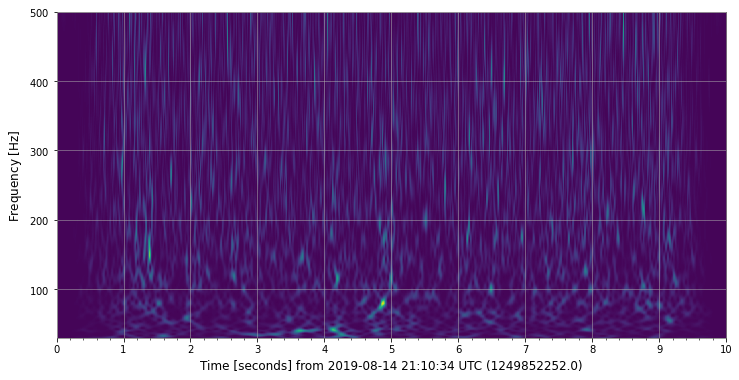

In [38]:
igps = int(event_gps('GW190814'))                                                         # Definer dit event
segment = (igps - 5, igps + 5)                                                            # Byg dit segment
hdata = TimeSeries.fetch_open_data('H1', *segment, tag='CLN', verbose=True, cache=True)   # Søg og hent data igen
hq = hdata.q_transform(frange=(30,500))                                                   # Udfør en Q-transtorm i frekvens området 30 - 500 Hz  
plot12 = hq.plot()                                                                        # Plot figuren

Ovenstående figur kaldes et *spektrogram* og den er baseret på den **Q-transform** vi anvendte - som er en analyse metode som kræver mindre kendskab til udstyret end den dataanalyse vi allerede har lavet.

På spektrogrammet ser vi et "*tydeligt*" spor fra en sammen smeltning af de to sorte huller. Lad os se om ikke vi kan rense det lidt. Den højeste energi time-frekvens pixel kan bestemmes til at være ca. $Q \approx 5$. Dette giver os problemer med længere signaler som fx et binært neutron stjerne signal. Vi kan derfor gennemløbe Q-transformen igen med et meget smallere Q-bånd ved højere Q fx omkring $Q \approx 100$.

For at udføre dette indsætter vi nu argumentet qrange(100,105) i vores ```q_transform```.

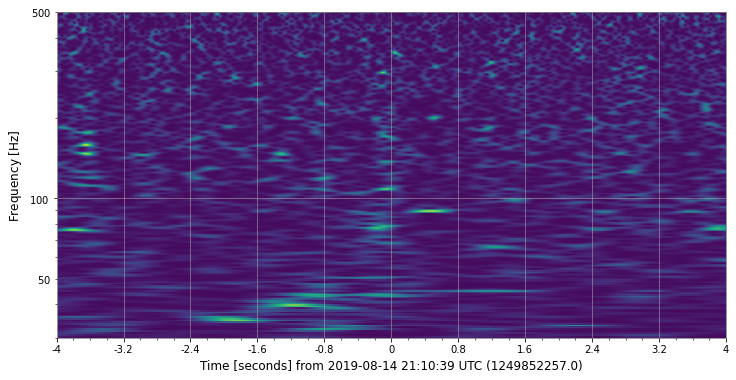

In [41]:
hq = hdata.q_transform(frange=(30,500), qrange=(100,105))   # Beregn Q-transformen som ovenfor men for smalt Q-bånd (100,105) kan justeres efter behov
plot13 = hq.plot()                                          # Plot figuren
ax = plot13.gca()                                           # Hent akse informationen
ax.set_epoch(igps)                                          # Set nulpunktet til event tidspunktet
ax.set_xlim(igps-4,igps+4)                                  # Definer hvad der vises på akserne
ax.set_yscale('log')                                        # Set den vertikale skala til at være en log skala

Nu ser vi et svagt signal for dette par af sorte huller umiddelbart efter  $T=-2$. (*her ses det sin en lidret skygge i de blå grønne nuancer. der slager sig opad mod koordinalet (0,100)*) Dette signal bør være meget tydeligere for det event I arbejder med.

Vi kan nu gentage øvelsen men for Livingston data for at se om ikke signalet der skulle være mere tydeligt.

### 9.1 Download Livingston data
Først skal vi downloade Livingston data, og gennemføre den samme data behandling som for Hanford datasættet - vi går ikke i detalje med det her.

Fetched 1 URLs from www.gw-openscience.org for [1249852252 .. 1249852262))
Reading data... [Done]


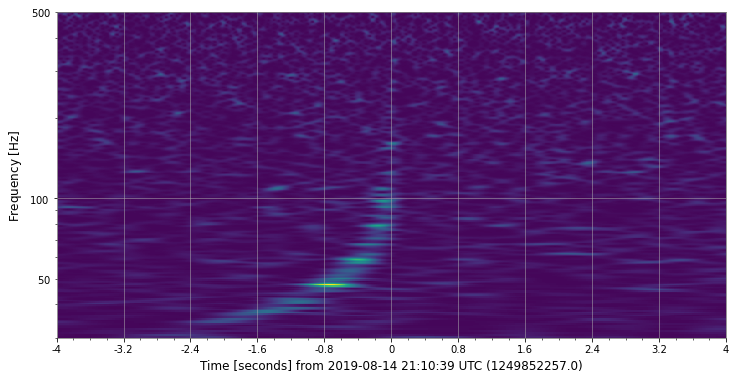

In [40]:
ldata = TimeSeries.fetch_open_data('L1', *segment, tag='CLN', verbose=True, cache=True)
lq = ldata.q_transform(frange=(30, 500), qrange=(100,105))
plot14 = lq.plot()
ax = plot14.gca()
ax.set_epoch(igps)
ax.set_xlim(igps-4,igps+4)
ax.set_yscale('log')

Her ser vi signalet meget tydeligere end i datasættet fra Handford. Vi er dermed ikke i tvivl om at vi ser to sorte huller som smelter sammen. 

---

### 9.2 - **Øvelse:** *Lav nu spektrogrammer*
Det er nu din opgave at lave to spektrogrammer et for data fra Handford for eventet GW150914

1. Ser du et spor fra en tyngdebølge på spetrogrammet fra Handford?
  * Kan du beskrive hvad du ser - hvordan du ser at der er en tyngdebølge?
  * Er signalet signifikant?

Lav ligeledes et spektrogram for data fra Livingston for det samme event (*GW150914*).

2. Indeholder dette spetrogram et tydeligt spor efter en tyngdebølge?
  * Kan du beskrive hvad du ser - hvordan du ser at der er en tyngdebølge?
  * Er signalet signifikant?
  * På hvilket måde adskilder signalet sig fra Hanford spektrogrammet?

Du kan med fordel anvende kode-felterne herunder til at lave dine spektrogrammer.

**HANDFORD - SPEKTROGRAM**

**LIVINGSTON SPEKTROGRAM**

**SUPER FLOT ARBEJDE** - Husk at gemme dine figurer

---

## 10 - Publikations figuren
Nu er det tid til at samle alle trådene til en samlet figur som man eventuelt ville kunne anvende i forbindelse med en større opgave. Til dette anvender vi en lidt mere advanceret udgave af den måde vi har plottet på indtil nu.


/usr/local/lib/python3.7/dist-packages/gwpy/plot/axes.py:164: MatplotlibDeprecationWarning: ScaleBase got an unexpected keyword argument 'epoch'. In the future this will raise TypeError
  return self.set_xscale(scale, epoch=epoch)


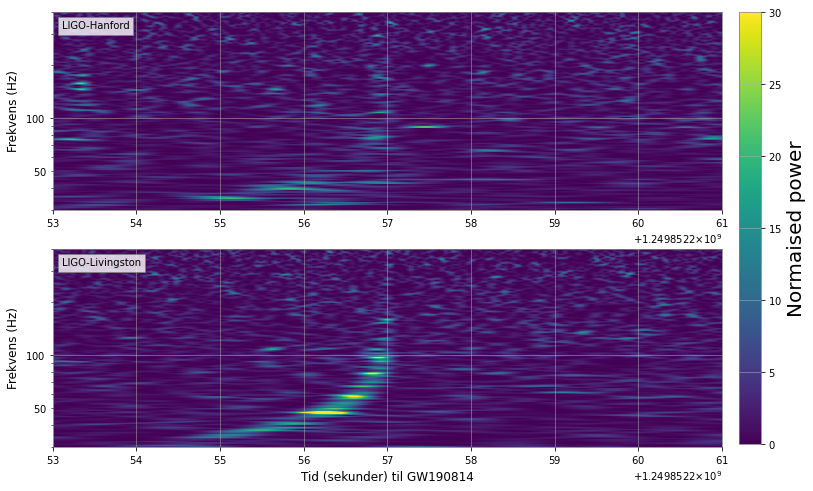

In [44]:
from matplotlib import pyplot as plt                                                                                                      # Indlæs plotte rotinen
fig, axs = plt.subplots(2,1,figsize=(12,8))                                                                                               # Opret et multiplot med to paneler

for ax, data, xlabel, detlabel in [(axs[0], hq, '', 'LIGO-Hanford'), (axs[1], lq, 'Tid (sekunder) til GW190814', 'LIGO-Livingston')]:     # Påbegynd for-løkke
  im=ax.pcolormesh(data, vmin=0, vmax=30)                                                                                                 # Definer yderpunkterne for farve skalaen samt datasættet

  # Tilføj skjulte elementer vi kan anvende.
  ax.plot(igps, 0, label=detlabel, visible=False)                                                                                         # Plot x-aksen men usynligt
  ax.legend(loc='upper left', handlelength=0, handletextpad=0)                                                                            # Tilføj en forklaring til panelerne

  # Formater akserne
  ax.set_epoch(igps)                                                                                                                      # Set nulpunktet
  ax.set_xlim(igps-4, igps + 4)                                                                                                           # Set området til igps +/- 4 
  ax.set_yscale('log')                                                                                                                    # Set y-aksen til at være logaritmisk
  ax.set_ylim(30,400)                                                                                                                     # Sæt y-området til 30 - 400 Hz
  ax.set_xlabel(xlabel)                                                                                                                   # Vis x-akse titlen
  ax.set_ylabel('Frekvens (Hz)')                                                                                                          # Vis y-akse titlen
  

# Finalize
cax = plt.axes([0.92, 0.13, 0.025, 0.75])                                                                                                 # Opret akse mærker
cbar = fig.colorbar(im, cax=cax)                                                                                                          # Lav en farveskala
cbar.set_label('Normaised power', size='20')                                                                                              # Plot farveskala forklaring

Nu har vi en rigtig flot figur som ville gøre sig godt i en opgave om gravitationsbølger. For at undersøge hvad der egentlig er smeltet samme og har skabt dette signal kan man med fordel konsultere følgende hjemmeside: [List of Gravitational wave observation](https://en.wikipedia.org/wiki/List_of_gravitational_wave_observations).

Af denne liste fremgår det at netop det event jeg her har behandlet er hhv. et **sort hul** med en masse på $M_1 = 23.2 M_\odot$ der er smeltet sammen med noget ukendt med en masse på $M_2 = 2.59 M_\odot$ efter kollisionen var der et *sort hul* med en masse på $M_\star = 25.6 M_\odot$.

Dette leder frem til jeres sidste opgave i denne øvelse

---

### 10.1 - **Øvelse:** *Lav den sidste figur for GW150914*
I denne øvelse skal du fremstille ovenstående figur på baggrund af de data du har arbejdet med frem til nu, altså eventet GW150915. Når du har lavet figuren og beskrevet hvad du kan se ud fra figuren så er det tid til at undersøge hvad signalet egentlig stammer fra.
1. Lav figuren ovenfor med data fra dit event.
2. Beskriv hvad du ser på grafen, hvad kigger vi efter og hvordan ser vi at der sker en sammensmeltning/detektion af en gravitationsbølge?
3. Besrkiv kilden til signalet - benyt: *List of gravitational wave observation* til at finde ud af hvad der er smeltet sammen og hvad der blev tilbage.

Du kan benytte kode-feltet herunder til at lave din figur.

**DU ER NU I MÅL - FLOT ARBEJDE**

---